# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### 2. Import Dataset

In [2]:
df_cyber = pd.read_csv("ExportedDatasetsNew/cyberbullying_final2Random.csv")

### 3.  Check first 10 lines

In [3]:
df_cyber.head(10)

,tweet_text,cyberbullying_type
0,pretty damn funny think bush drives people cra...,0
1,ignore nfl treat exist kneel anthem nfl overpa...,1
2,fucking hate explaining like people dont know ...,1
3,bandits dragons still attack dog im bloody min...,0
4,girls bullied high school like,1
5,kickstarter tempting im weird money still feel...,1
6,would love know gas like cents cheaper alabama...,0
7,rips clothes,1
8,well cant make rape jokes men thats gay jeez g...,1
9,demographic shift already happened kashmiri hi...,1


### 4. Identify Dataset & Drop Missing Data

In [4]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61361 entries, 0 to 61360
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          61249 non-null  object
 1   cyberbullying_type  61361 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 958.9+ KB


In [5]:
df_cyber.shape

(61361, 2)

In [6]:
df_cyber.isnull().sum()

tweet_text            112
cyberbullying_type      0
dtype: int64

In [7]:
df_cyber = df_cyber.dropna()

In [8]:
df_cyber.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

### 4.2 Identify & Drop Duplicates

In [9]:
df_cyber.tweet_text.duplicated().sum()

6815

In [10]:
df_cyber.duplicated(subset='tweet_text').sum()

6815

In [11]:
df_cyber.duplicated(subset=['tweet_text','cyberbullying_type']).sum()

4948

In [12]:
df_cyber = df_cyber.drop_duplicates(subset=['tweet_text','cyberbullying_type'])

In [13]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56301 entries, 0 to 61360
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          56301 non-null  object
 1   cyberbullying_type  56301 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [14]:
df_cyber['cyberbullying_type'].value_counts()

1    36985
0    19316
Name: cyberbullying_type, dtype: int64

In [15]:
df_cyber.tweet_text.duplicated().sum()

1867

In [16]:
df_cyber.drop_duplicates(keep=False, inplace=True)

In [17]:
df_cyber.duplicated().sum()

0

In [18]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56301 entries, 0 to 61360
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          56301 non-null  object
 1   cyberbullying_type  56301 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [19]:
df_cyber['cyberbullying_type'].value_counts()

1    36985
0    19316
Name: cyberbullying_type, dtype: int64

In [20]:
# # Shuffling
# df_cyber = df_cyber.sample(frac=1)
# df_cyber.reset_index(inplace=True)
# df_cyber.drop(["index"], axis=1, inplace=True)

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

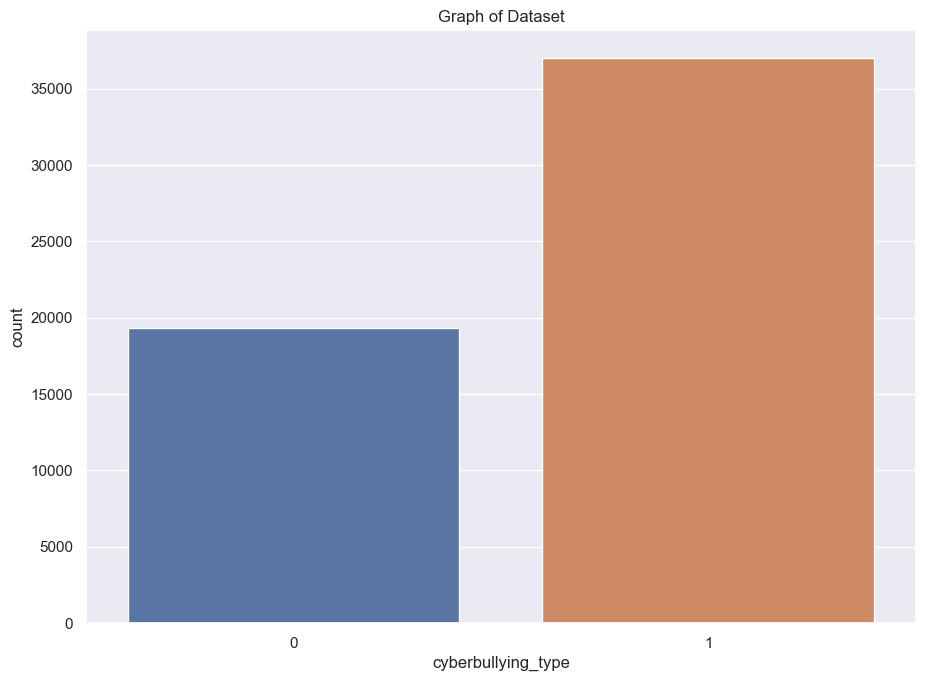

In [21]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=df_cyber).set(title="Graph of Dataset")

In [22]:
# Identify rows with empty text
empty_rows = df_cyber[df_cyber.applymap(lambda x: x == '').any(axis=1)]

# Remove these rows from the dataset
df_cyber = df_cyber.drop(empty_rows.index)

In [23]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56301 entries, 0 to 61360
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          56301 non-null  object
 1   cyberbullying_type  56301 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


### 7. Stopwords

In [24]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [25]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
# Download the NLTK resources that are needed
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
df_cyber["tweet_text"] = df_cyber["tweet_text"].apply(lambda x: x.lower())

In [28]:
# Initialize the stemmer and the stop words list
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [29]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = text.lower() # Convert to lowercase
    text = [stemmer.stem(word) for word in text.split() if word not in stopwords.words('english')] # Remove stopwords
    return " ".join(text)

In [30]:
df_cyber["tweet_text"] = df_cyber["tweet_text"].apply(preprocess_text)

In [31]:
df_cyber.head(30)

,tweet_text,cyberbullying_type
0,pretti damn funni think bush drive peopl crazi...,0
1,ignor nfl treat exist kneel anthem nfl overpai...,1
2,fuck hate explain like peopl dont know like ex...,1
3,bandit dragon still attack dog im bloodi mine ...,0
4,girl bulli high school like,1
5,kickstart tempt im weird money still feel kind...,1
6,would love know ga like cent cheaper alabama g...,0
7,rip cloth,1
8,well cant make rape joke men that gay jeez get...,1
9,demograph shift alreadi happen kashmiri hindu ...,1


### 8. Data pre-processing

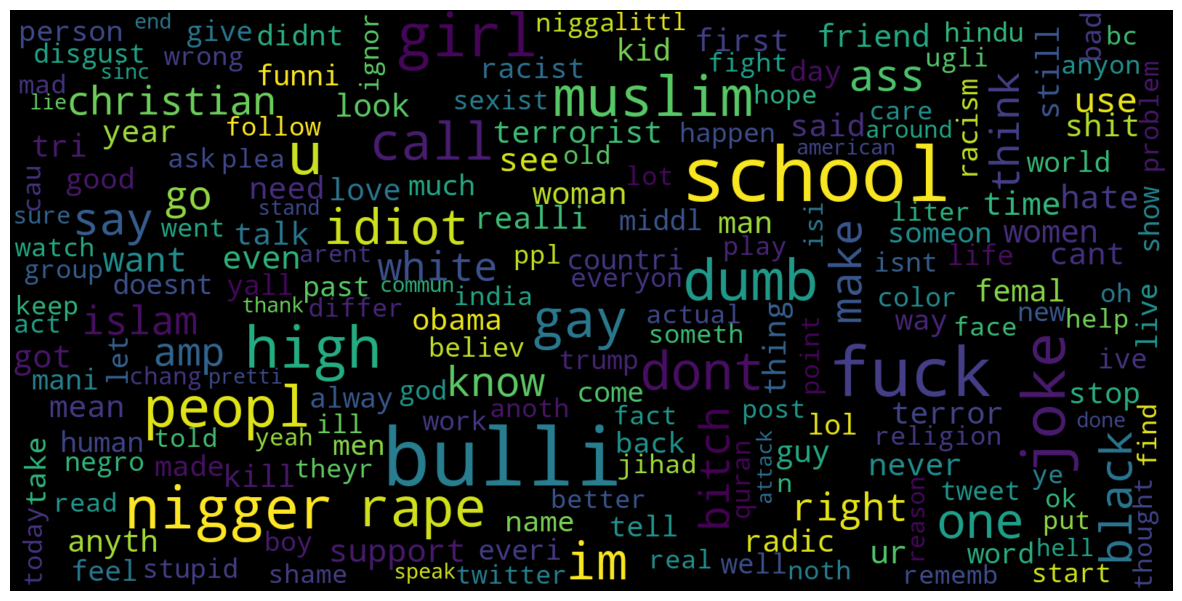

In [32]:
# Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['tweet_text'][df_cyber['cyberbullying_type'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

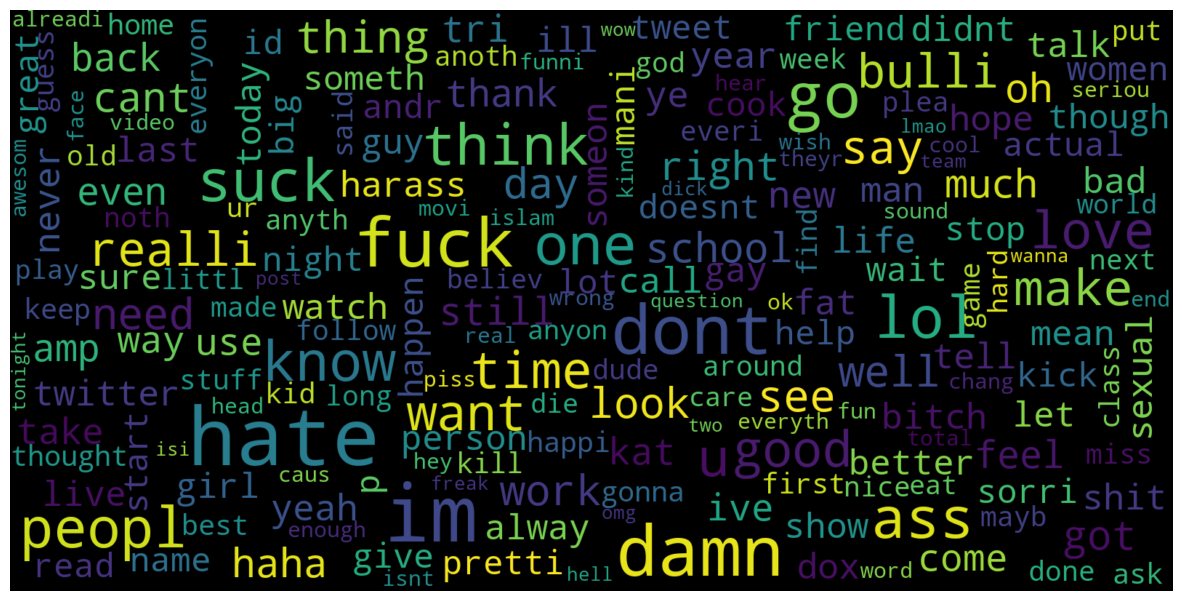

In [33]:
# Not Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['tweet_text'][df_cyber['cyberbullying_type'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

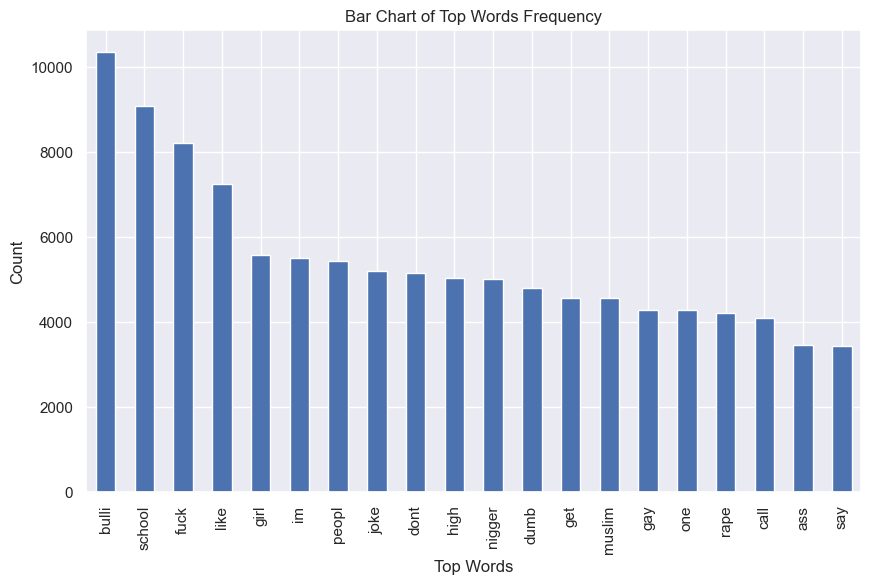

In [34]:


from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_cyber['tweet_text'].astype('U'), 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

### 11. Train/Test Splitting

In [35]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df_cyber['tweet_text'],
                                                    df_cyber['cyberbullying_type'],
                                                    test_size=0.2,
                                                    random_state=42)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [36]:
x_train.shape

(45040,)

In [37]:
x_test.shape

(11261,)

In [38]:
y_train.shape

(45040,)

In [39]:
y_test.shape

(11261,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

vectorization = CountVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [41]:
print(x_train)

  (0, 15263)	1
  (0, 12051)	1
  (0, 13834)	1
  (0, 2964)	1
  (0, 16571)	1
  (0, 28777)	1
  (1, 32882)	1
  (1, 31652)	1
  (2, 3390)	1
  (2, 18413)	1
  (2, 11813)	1
  (2, 11297)	1
  (2, 4067)	1
  (2, 12887)	1
  (2, 25394)	1
  (2, 27569)	1
  (2, 12300)	1
  (2, 29409)	1
  (3, 19845)	1
  (3, 11687)	1
  (3, 11881)	1
  (4, 3098)	1
  (5, 7522)	1
  (5, 16685)	1
  (5, 3362)	1
  :	:
  (45037, 26463)	1
  (45037, 3472)	1
  (45037, 12279)	1
  (45037, 3368)	1
  (45038, 27569)	1
  (45038, 29025)	1
  (45038, 6755)	1
  (45038, 7333)	1
  (45038, 2877)	1
  (45038, 6180)	2
  (45038, 30101)	1
  (45038, 22926)	1
  (45038, 5428)	1
  (45038, 20475)	1
  (45039, 17128)	1
  (45039, 7881)	1
  (45039, 901)	1
  (45039, 32664)	1
  (45039, 485)	1
  (45039, 11764)	1
  (45039, 3634)	1
  (45039, 2609)	1
  (45039, 297)	1
  (45039, 8884)	1
  (45039, 30546)	1


In [42]:
print(x_test)

  (0, 4594)	1
  (0, 5836)	1
  (0, 7542)	1
  (0, 8180)	1
  (0, 11177)	1
  (0, 15781)	1
  (0, 16685)	1
  (0, 17844)	1
  (0, 20756)	1
  (0, 21406)	2
  (0, 28753)	1
  (1, 862)	1
  (1, 5690)	1
  (1, 10207)	1
  (1, 10415)	1
  (1, 11525)	1
  (1, 12014)	1
  (1, 13413)	1
  (1, 13834)	1
  (1, 14462)	1
  (1, 16804)	1
  (1, 20243)	1
  (1, 25287)	1
  (1, 25635)	1
  (1, 27742)	1
  :	:
  (11258, 27154)	1
  (11258, 29169)	1
  (11258, 31655)	1
  (11258, 32748)	1
  (11259, 279)	1
  (11259, 4439)	1
  (11259, 6755)	1
  (11259, 6910)	2
  (11259, 9190)	1
  (11259, 17227)	1
  (11259, 25394)	1
  (11259, 26397)	1
  (11259, 29457)	1
  (11259, 31413)	2
  (11259, 31599)	1
  (11259, 32250)	1
  (11260, 1753)	1
  (11260, 3123)	1
  (11260, 6580)	1
  (11260, 8279)	1
  (11260, 10600)	1
  (11260, 18776)	1
  (11260, 19865)	1
  (11260, 19882)	1
  (11260, 29007)	1


In [43]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Initialize the model
svc = SVC()

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize the grid search
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_test, y_test)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.8403343006640446


### Logistic Regression (LR)

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9056838365896981
0.8401562916259657


C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.81      0.75      0.77      4139
           1       0.86      0.90      0.88      7122

    accuracy                           0.84     11261
   macro avg       0.83      0.82      0.83     11261
weighted avg       0.84      0.84      0.84     11261



### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.973867673179396
0.7963768759435219


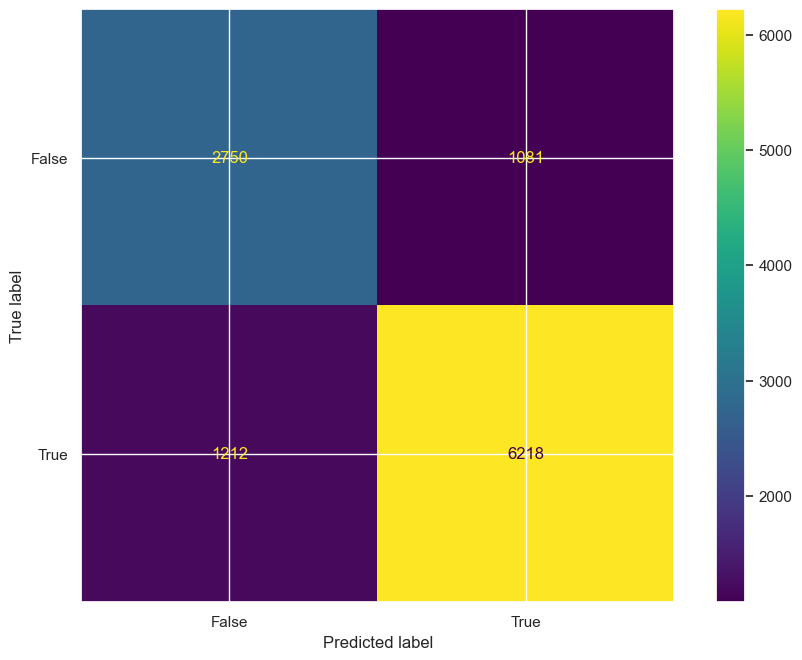

In [47]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [48]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71      3962
           1       0.84      0.85      0.84      7299

    accuracy                           0.80     11261
   macro avg       0.78      0.77      0.78     11261
weighted avg       0.79      0.80      0.80     11261



### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9736234458259325
0.8153805168279904


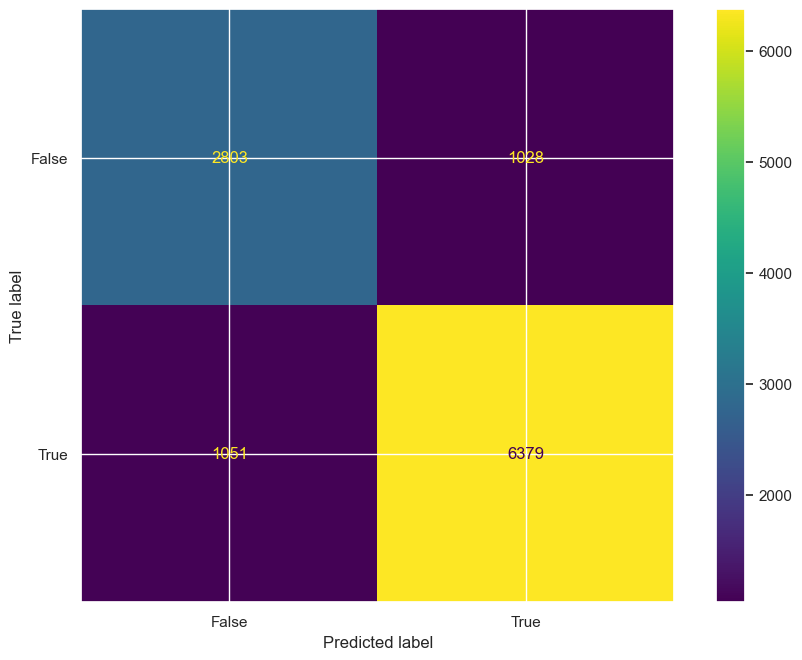

In [50]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [51]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      3854
           1       0.86      0.86      0.86      7407

    accuracy                           0.82     11261
   macro avg       0.80      0.79      0.79     11261
weighted avg       0.82      0.82      0.82     11261



### XGBoost

In [52]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train,y_train)

C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [53]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8617007104795738
0.8475268626232129


In [54]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      4726
           1       0.82      0.94      0.88      6535

    accuracy                           0.85     11261
   macro avg       0.86      0.83      0.84     11261
weighted avg       0.85      0.85      0.84     11261



### Multinomial Naive Bayes

In [55]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8527309058614565
0.8118284344196786


In [56]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70      3208
           1       0.90      0.83      0.86      8053

    accuracy                           0.81     11261
   macro avg       0.77      0.80      0.78     11261
weighted avg       0.83      0.81      0.82     11261



### Support Vector Machine

In [57]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9259769094138544
0.8299440547020691


In [58]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      4158
           1       0.85      0.89      0.87      7103

    accuracy                           0.83     11261
   macro avg       0.82      0.81      0.81     11261
weighted avg       0.83      0.83      0.83     11261



### K-Nearest Neighbours

In [59]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8432504440497336
0.7598792291981173


In [60]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70      5145
           1       0.73      0.89      0.80      6116

    accuracy                           0.76     11261
   macro avg       0.77      0.75      0.75     11261
weighted avg       0.77      0.76      0.75     11261



### Bagging Decision Tree (Ensemble Learning I)

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.7,max_features=1.0,n_estimators=30)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9617895204262877
0.8192878074771335


In [62]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      3940
           1       0.86      0.87      0.86      7321

    accuracy                           0.82     11261
   macro avg       0.80      0.80      0.80     11261
weighted avg       0.82      0.82      0.82     11261



### Boosting Decision Tree (Ensemble Learning II)

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=1,max_depth=5),n_estimators=40,learning_rate=0.5)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8632770870337477
0.8419323328301217


In [64]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      4815
           1       0.81      0.94      0.87      6446

    accuracy                           0.84     11261
   macro avg       0.86      0.83      0.83     11261
weighted avg       0.85      0.84      0.84     11261



In [76]:
user = input("Enter a text: ")
data = vectorization.transform([user]).toarray()
output = model.predict(data)
print(output)

[0]
